# Descoberta Guiada Aula 3


# Classificador Naive Bayes

### Bibliotecas necessárias:

In [1]:
from sklearn.datasets import load_breast_cancer #dataset para casos de cancer
from sklearn.naive_bayes import BernoulliNB # Naive Bayes para o caso de uma distribuição de Bernoulli
from sklearn.naive_bayes import GaussianNB # Naive Bayes para o caso de uma distribuição de Gaussiana
from sklearn.model_selection import train_test_split # separação do dataset para validação e treinamento
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # métricas de avaliação do modelo

import seaborn as sns # biblioteca par geração de gráficos
import matplotlib.pyplot as plt

# Coleta dos dados

In [2]:
dados = load_breast_cancer(as_frame=True)

# Preparação dos dados

In [3]:
X = dados['data']
Y = dados['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y)

# Validação do balanceamento

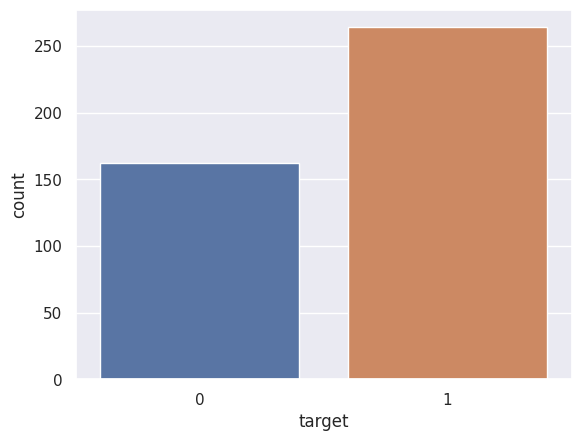

In [4]:
sns.set(style="darkgrid")
ax = sns.countplot(x=y_train)

#Aplicação do Modelo

In [5]:
modelo_naive = BernoulliNB()
modelo_naive.fit(x_train, y_train)

BernoulliNB()

In [6]:
y_pred = modelo_naive.predict(x_test)

# Métricas de avaliação
Vamos plotar e avaliar a matriz de confusão dos resultados

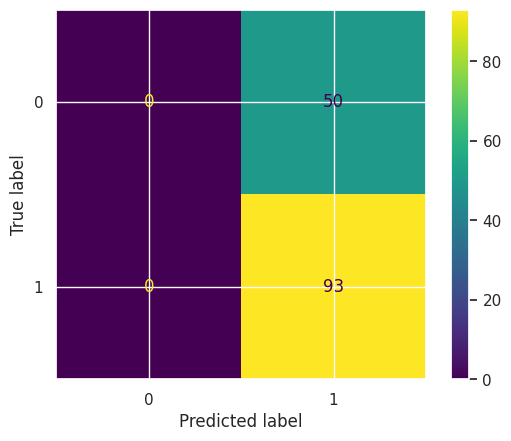

In [7]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Análise:
O que essa matriz de confusão te dis sobre o modelo?

Teste agora esse mesmo dataset, porém utilizando um modelo Naive Bayes Gaussiano